### 로지스틱 회귀
: 선형방정식을 이용하여 회귀란 단어가 있지만 실제적으로 분류에 대한 확률을 계산하는 모델이다. 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
fish = pd.read_csv("../Data/fishes.csv")
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [4]:
# Target으로 사용될 Species의 종류 알아보기 
fish.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [5]:
# Species별 Data의 차이가 큰지 ?
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [6]:
fish.describe()

,Weight,Length,Diagonal,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,28.415723,31.227044,8.970994,4.417486
std,357.978317,10.716328,11.610246,4.286208,1.685804
min,0.000000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,63.400000,68.000000,18.957000,8.142000


> 정규화가 필요하다.

### Feature와 Target으로 분리

In [7]:
# Feature Data : Weight, Length, Diagonal, Height, Width 만 선택하여 numpy배열로 변경 
fish_input = fish[['Weight','Length',"Diagonal","Height","Width"]].to_numpy()
fish_input[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [8]:
# Target Data : Species를 선택하여 numpy 배열로 변경
fish_target = fish['Species'].to_numpy()
fish_target[:5]

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

### train과 test로 분리하기

In [9]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
                                                            fish_input,
                                                            fish_target,
                                                            random_state=42,
) 
# 회귀식은 stratify 사용하면 안됨

### 표준화 시키기
: 각 컬럼별 데이터의 크기 차이가 많이 나는 경우 사용

In [10]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [11]:
train_scaled[:5]

array([[ 0.91965782,  0.60943175,  0.81041221,  1.85194896,  1.00075672],
       [ 0.30041219,  1.54653445,  1.45316551, -0.46981663,  0.27291745],
       [-1.0858536 , -1.68646987, -1.70848587, -1.70159849, -2.0044758 ],
       [-0.79734143, -0.60880176, -0.67486907, -0.82480589, -0.27631471],
       [-0.71289885, -0.73062511, -0.70092664, -0.0802298 , -0.7033869 ]])

In [12]:
test_scaled[:5]

array([[-0.88741352, -0.91804565, -1.03098914, -0.90464451, -0.80762518],
       [-1.06924656, -1.50842035, -1.54345461, -1.58849582, -1.93803151],
       [-0.54401367,  0.35641402,  0.30663259, -0.8135697 , -0.65388895],
       [-0.34698097, -0.23396068, -0.22320459, -0.11905019, -0.12233464],
       [-0.68475132, -0.51509149, -0.58801052, -0.8998784 , -0.50124996]])

---
### KNN을이용한 확률 예측

In [13]:
# n_neighbors = 3인 경우의 KNN 분류 예측
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print('trina score:', kn.score(train_scaled, train_target))
print('test score:', kn.score(test_scaled, test_target))


trina score: 0.8907563025210085
test score: 0.85


In [14]:
# test data의 처음부터 5개로 예측해보기
kn.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

In [15]:
# test data의 확률값 보기
import numpy as np

In [16]:
proba = kn.predict_proba(test_scaled[:5])
np.round(proba, decimals=4)

array([[0.    , 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.    ],
       [0.    , 0.    , 0.    , 1.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ]])

In [17]:
# kn의 분류
kn.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [18]:
# test data의 3번째에 대한 이웃들을 알아보기
distances, indexes = kn.kneighbors(test_scaled[3:4])
indexes

array([[104, 115, 106]], dtype=int64)

In [19]:
train_target[indexes]

array([['Roach', 'Perch', 'Perch']], dtype=object)

> KNN은 이웃 갯수를 정하는 모델이다.  
현재 이웃의 갯수를 3으로 하였기 때문에 확률로 나올 수 있는 경우는 3가지(1/3, 2/3, 3/3) => 확률로 하기에는 좀..

---
### 로지스틱 회귀를 이용한 확률 예측
- 데이터의 각 컬럼을 새로운 변수로 사용하는 다중회귀를 이용한 확률
- 회귀식을 사용하여 로지스틱 회귀라고 하나 실질적으로 확률을 예측하는 모델임
- 선형회귀식에서 출발하였고 딥러닝 모델의 기반임

기본적으로 위의 데이터를 보면  
z = a무게 + b길이 + c대각선 + d높이 + e두께 + f 로 구성되어 있다.  
z식을 이용하면 나오는 결과값으 -무한대 ~ +무한대의 범위로 결과값이 출력된다.  
이를 해결하는 방법이 Sigmoid함수 사용.  
Sigmoid함수는 결과값이 0~1 사이의 수만 출력하므로 0.5를 기준으로 양성클래스(1, True)와 음성클래스(0, False)로 분류한다.  
로지스틱 회귀를 사용할 경우에는 Sigmoid 함수를 로지스틱 함수라고 표현한다.  

In [20]:
# Sigmoid Graph를 출력해보기
import matplotlib.pyplot as plt

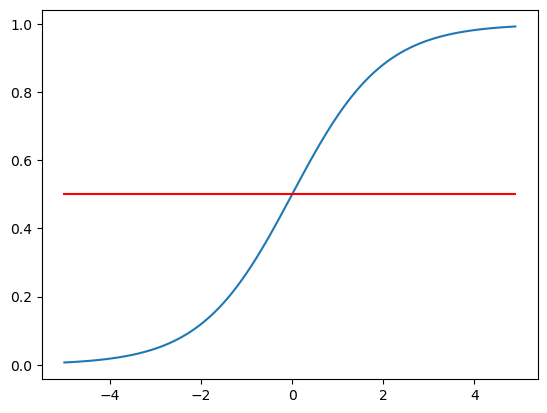

In [21]:
z = np.arange(-5, 5, 0.1)
y = np.full((100,1), 0.5)
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.plot(z, y, c='red')
plt.show()

> sigmoid는 회귀가 아닌 분류할 수 있는 방법을 제시

### 로지스틱 회귀로 이진 분류 수행하기

In [22]:
# 2종류의 데이터만 발췌하기
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

print(train_bream_smelt[:5])
print(target_bream_smelt[:5])

[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [ 0.63818253  0.56257661  0.73223951  1.64473401  0.50705737]
 [ 0.30041219  0.23459067  0.42823457  1.36042157  0.22329758]
 [ 0.9027693   0.70314202  0.88858491  1.89027545  0.85537174]]
['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [23]:
# 로지스틱 회귀 실행하기
from sklearn.linear_model import LogisticRegression

In [24]:
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [25]:
# predict로 예측값 확인하기
lr.predict(train_bream_smelt[:5])

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [26]:
# predict_proba로 예측값 확률 분포 확인하기
lr.predict_proba(train_bream_smelt[:5])

array([[0.99760007, 0.00239993],
       [0.02737325, 0.97262675],
       [0.99486386, 0.00513614],
       [0.98585047, 0.01414953],
       [0.99767419, 0.00232581]])

In [27]:
# 클래스 종류
lr.classes_

array(['Bream', 'Smelt'], dtype=object)

In [28]:
# 회귀식의 가중치 확인
print(lr.coef_, lr.intercept_)

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


In [29]:
# decision function (다중식 계산)
decisions = lr.decision_function(train_bream_smelt[:5])
decisions

array([-6.02991358,  3.57043428, -5.26630496, -4.24382314, -6.06135688])

In [30]:
# Sigmoid 함수에 대입하여 확률값을 구성한다.
from scipy.special import expit

In [31]:
print(expit(decisions))

[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


> 0번과 1번의 분류 중 1번의 기준으로 계산되고, 0번은 확률값 1에서 1번의 값을 빼기로 계산된다.

---
### 로지스틱 회귀로 다중 분류 수행하기

In [32]:
lr = LogisticRegression(C=20, max_iter=1000) # 기본값: C=1, max_iter=100
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled,test_target))


0.9327731092436975
0.925


> c: 릿지규제이며 기본은 1이다. 적은수가 강한 규제를 의미한다.  
max_iter: 반복 횟수. 모델의 정확성을 유지하기 위해 반복작업을 실시

---

In [33]:
# test data로 예측
lr.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Roach', 'Perch'], dtype=object)

In [34]:
# test data로 확률 예측
proba = lr.predict_proba(test_scaled[:5])
np.round(proba, decimals=3)

array([[0.   , 0.014, 0.842, 0.   , 0.135, 0.007, 0.003],
       [0.   , 0.003, 0.044, 0.   , 0.007, 0.946, 0.   ],
       [0.   , 0.   , 0.034, 0.934, 0.015, 0.016, 0.   ],
       [0.011, 0.034, 0.305, 0.006, 0.567, 0.   , 0.076],
       [0.   , 0.   , 0.904, 0.002, 0.089, 0.002, 0.001]])

In [35]:
# 분류 class
lr.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

---

In [36]:
# 사용된 다중 공식 확인
print(lr.coef_, lr.intercept_)

[[-1.50605456 -1.03747913  2.60919713  7.69422741 -1.18603342]
 [ 0.19200046 -1.99988812 -3.79617724  6.5031264  -2.00022753]
 [ 3.55793539  6.36988929 -8.52233733 -5.75397233  3.79233438]
 [-0.11453309  3.61060121  3.94464503 -3.62243904 -1.75981679]
 [-1.40843718 -6.09242191  5.28629634 -0.86696569  1.84518455]
 [-1.33419947  1.48153392  1.38217547 -5.6602348  -4.39228964]
 [ 0.61328845 -2.33223526 -0.90379939  1.70625807  3.70084846]] [-0.10345047 -0.27281218  3.24444852 -0.17565069  2.64960025 -6.72042849
  1.37829306]


### 확률 분포 검증

In [37]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.51   1.04   5.17  -2.76   3.34   0.35  -0.63]
 [-10.88   1.94   4.78  -2.42   2.99   7.84  -4.25]
 [ -4.34  -6.24   3.17   6.48   2.36   2.43  -3.87]
 [ -0.69   0.45   2.64  -1.21   3.26  -5.7    1.26]
 [ -6.4   -1.99   5.82  -0.13   3.5   -0.09  -0.7 ]]


> 계산할 항목이 여러개이므로 이를 sigmoid를 사용하면 각자의 값이 생성되어 확률의 합이 1이 넘는 경우가 발생한다.  
다중 항목인 경우에는 softmax를 사용한다.

In [41]:
from scipy.special import softmax
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
